<a href="https://colab.research.google.com/github/rishitharaj/Classification-Algorithms-Model-Building/blob/main/Classification_Algorithms_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Objective:**

The objective of this assessment is to evaluate your understanding and ability to apply supervised learning techniques to a real-world dataset.

**Dataset:**

Use the breast cancer dataset available in the sklearn library.

**Key components to be fulfilled:**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.utils import Bunch
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [61]:
#helper function for confusion matrix plotting

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.colorbar()

    # Tick labels
    plt.xticks([0, 1], ["Malignant (0)", "Benign (1)"])
    plt.yticks([0, 1], ["Malignant (0)", "Benign (1)"])

    # Loop through matrix to annotate values
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=14)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

##**Loading and Preprocessing:**
- Load the breast cancer dataset from sklearn.
- Preprocess the data to handle any missing values and perform necessary feature
scaling.
- Explain the preprocessing steps you performed and justify why they are
necessary for this dataset.

In [40]:
data = load_breast_cancer(as_frame=True)
df = data.frame.copy()
#df.head()


In [41]:
df.shape

(569, 31)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [43]:
#df.head()

In [44]:
df['target'].value_counts()

,count
target,
1,357
0,212


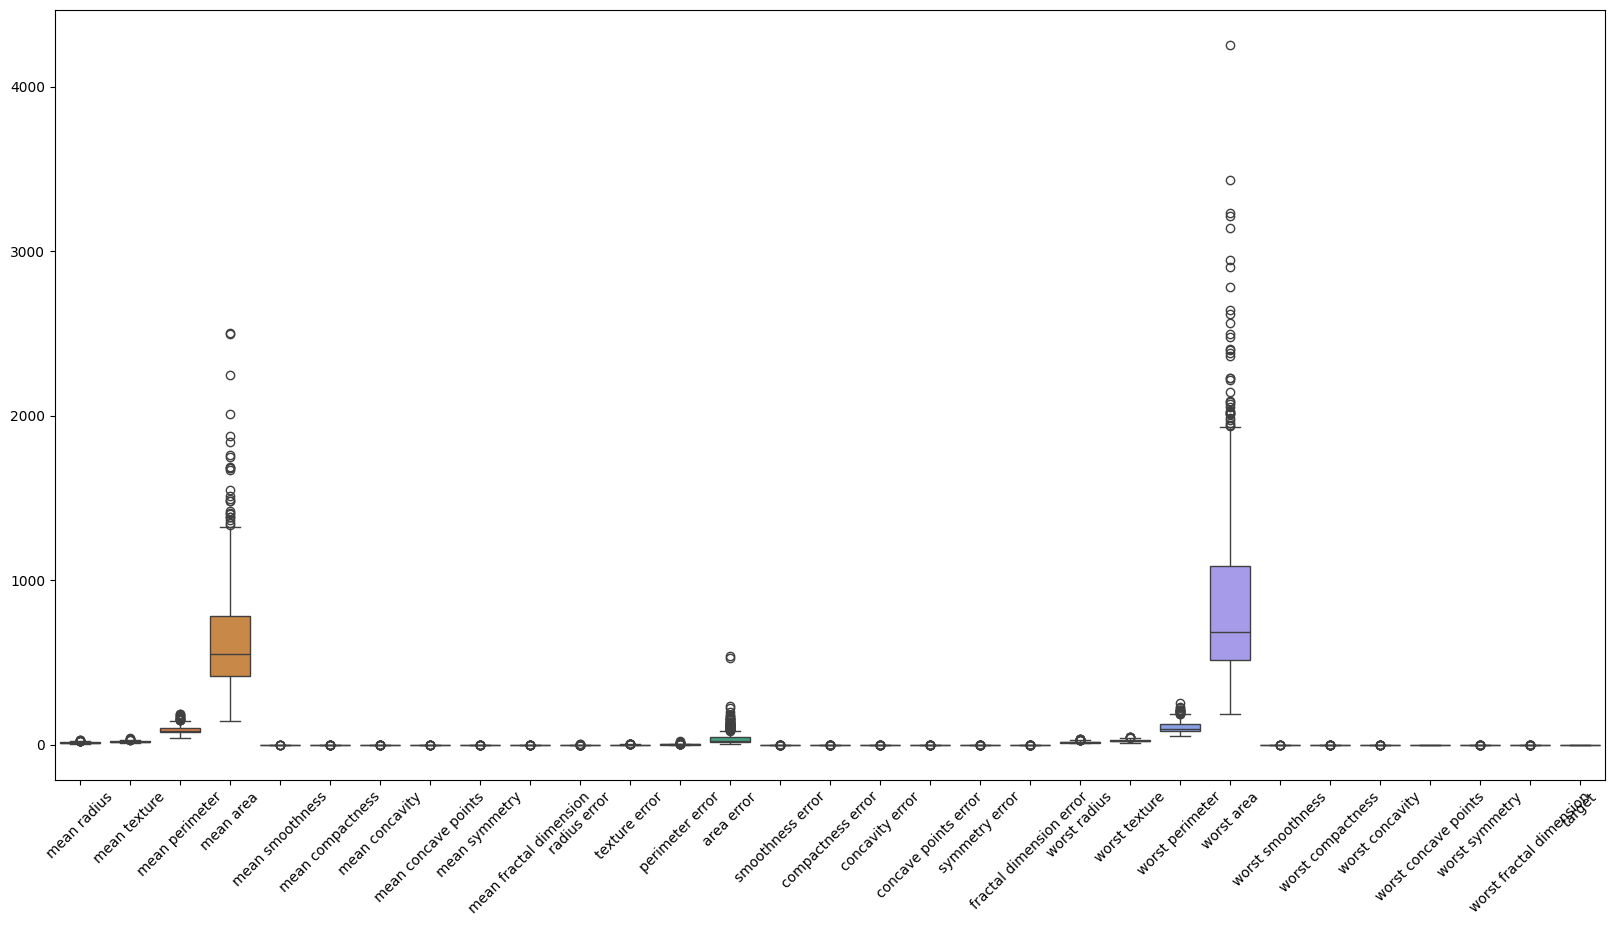

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [46]:
#split the x & y
x = df.drop('target', axis=1)
y = df['target']

In [47]:
# Null value handling
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_imputed)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)


**Observations**


1. No null value in the dataset
2. All features are in numeric value, so encoding also not required
3. Essential because many ML models (SVM, Logistic Regression, kNN) are distance-based and require standardized numerical scale.



##**Classification Algorithm Implementation:**

Implement the following five classification algorithms:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Support Vector Machine (SVM)
5. k-Nearest Neighbors (k-NN)
For each algorithm, provide a brief description of how it works and why it might be suitable for this dataset.

**Logistic Regression**

- Logistic regression models probability using a sigmoid function.
- Good baseline classifier for linearly separable data.
- Works well for high-dimensional datasets like this one.

In [48]:
##Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(x_train, y_train)
y_pred_lr = log_reg.predict(x_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_lr


0.9787234042553191

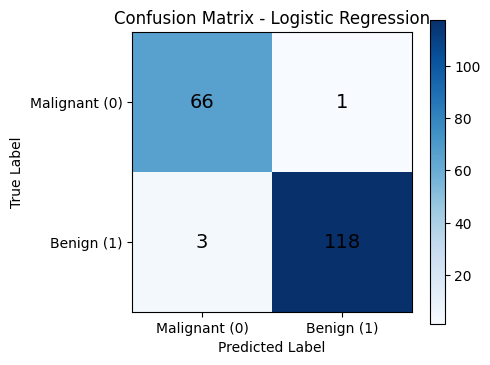

In [59]:
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")

**Decision Tree Classifier**
- Splits data based on features that give maximum information gain.
- Easy to interpret but can overfit.

In [49]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_dt


0.9202127659574468

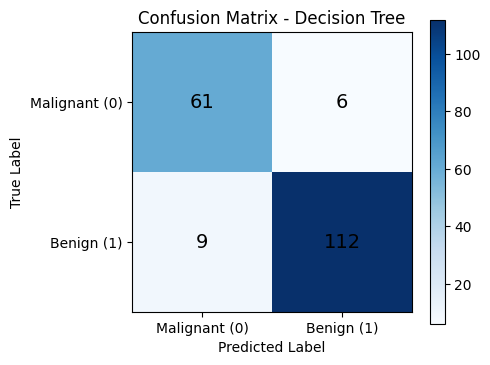

In [62]:
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree")

**Random Forest Classifier**
- An ensemble of multiple decision trees.
- Reduces overfitting, gives higher accuracy.
- Works well for this structured dataset.

In [50]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf


0.9574468085106383

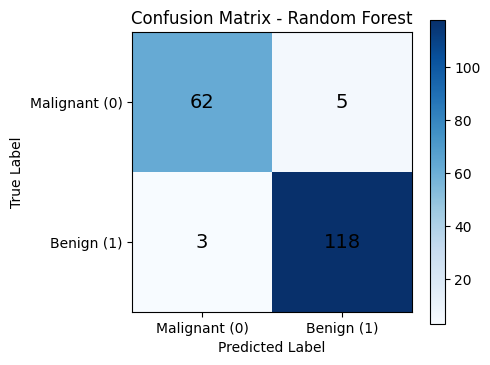

In [63]:
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")

**Support Vector Machine**
- Finds the best separating hyperplane using margins.
- Excellent for high-dimensional datasets.
- Sensitive to scaling → hence StandardScaler done

In [51]:
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_svm


0.9680851063829787

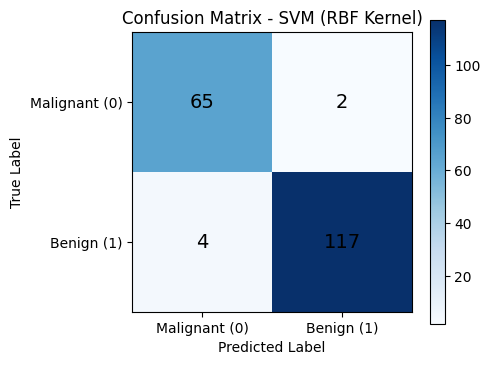

In [64]:
plot_conf_matrix(y_test, y_pred_svm, "SVM (RBF Kernel)")

**k-Nearest Neighbors**
- Looks at the nearest k data points and classifies by majority vote.
- Requires normalization because it uses Euclidean distance.

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn


0.9574468085106383

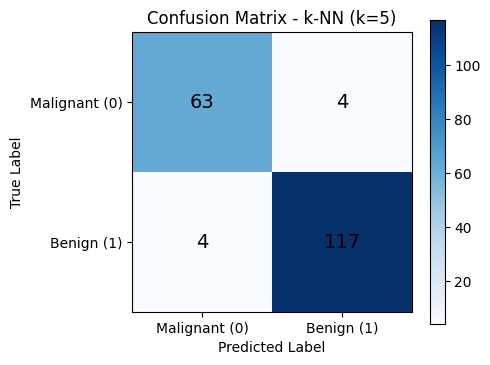

In [65]:
plot_conf_matrix(y_test, y_pred_knn, "k-NN (k=5)")

##**Model Comparison:**

- Compare the performance of the five classification algorithms.
- Which algorithm performed the best and which one performed the worst?


In [53]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "k-NN"],
    "Accuracy": [acc_lr, acc_dt, acc_rf, acc_svm, acc_knn]
})

results.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
0,Logistic Regression,0.978723
3,SVM,0.968085
2,Random Forest,0.957447
4,k-NN,0.957447
1,Decision Tree,0.920213


**Timely Submission**
- Submission Guidelines: Provide your code in a Jupyter Notebook format and
submit the GitHub link here. Ensure your explanations and answers are clear and
concise.
Total Score: 10